# Pressure Testing

### Protocol 1

1. Seal crucible body with greased cork and o-ring
2. Pull vacuum for 10 minutes
3. Record 10-minute pressure and calculate RMS pressure
4. Close valve and turn pump off
5. Record time stable at 10-minute pressure
6. Record time to reach RMS pressure
7. Repeat for 3 cycles without removing crucible body from vacuum pump

In [16]:
import math
import matplotlib.pyplot as plt

In [23]:
all_runs = dict()
colors = ["b", "g", "r", "c", "m", "y", "k"]
fig, axarr = plt.subplots(3, 1)
fig.set_size_inches(6, 18)

def rms_pressure(pressure):
    return pressure/math.sqrt(2)

#slow but readable
def record(ten_min_pressure, stable_time, rms_time, run, cycle):
    if run not in set(all_runs.keys()):
        all_runs[run] = {cycle: {"10 min pressure": ten_min_pressure, "stable time": stable_time, \
                                        "rms time": rms_time}}
    all_runs[run][cycle] = {"10 min pressure": ten_min_pressure, "stable time": stable_time, \
                                        "rms time": rms_time}
    
    
def plot_all(start, stop):
    color_iter = iter(colors)
    run = start
    max_cycles = max([len(list(all_runs.get(run))) for run in range(start, stop)])
    def next_color():
        try:
            return next(color_iter)
        except:
            color_iter = iter(colors)
            return next(color_iter)
        
    def plot_run(run):
        if len(list(all_runs.get(run))) == max_cycles:
            ten_min_pressure = [all_runs.get(run).get(cycle).get("10 min pressure") for cycle in list(all_runs.get(run))]
            stable_time = [all_runs.get(run).get(cycle).get("stable time") for cycle in list(all_runs.get(run))]
            rms_time = [all_runs.get(run).get(cycle).get("rms time") for cycle in list(all_runs.get(run))]
        else: 
            ten_min_pressure = [all_runs.get(run).get(cycle).get("10 min pressure") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))] 
            stable_time = [all_runs.get(run).get(cycle).get("stable time") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))] 
            rms_time = [all_runs.get(run).get(cycle).get("rms time") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))]
        axarr[0].plot(range(3), ten_min_pressuree, '--', marker='o', color=next_color(), label="run "+str(run))
        axarr[1].plot(range(3), stable_time, '--', marker='o', color=next_color(), label="run "+str(run))  
        axarr[2].plot(range(3), rms_time, '--', marker='o', color=next_color(), label="run "+str(run)) 
        return 1
    
    for run in range(start, stop):
        plot_run(run)
    axarr[0].set_xlabel('cycles')
    axarr[0].set_ylabel("10 min pressure (mmHg)")
    axarr[0].set_title("10 min pressure for runs " + str(start) + " to " + str(stop))
    axarr[1].set_xlabel('cycles')
    axarr[1].set_ylabel("stable time (sec)")
    axarr[1].set_title("stable time for runs " + str(start) + " to " + str(stop))
    axarr[2].set_xlabel('cycles')
    axarr[2].set_ylabel("rms time (sec)")
    axarr[2].set_title("rms time for runs " + str(start) + " to " + str(stop))
    plt.tight_layout()
    plt.show()    

In [24]:
#EXPERIMENT-TIME CALCUALTIONS

rms_pressure(27)

19.09188309203678

In [88]:
#RECORD AND PLOT CYCLE DATA

#record(ten_min_pressure, stable_time, rms_time, run, cycle)
#print(list(all_runs))
#plot_all(list(all_runs), len(list(all_runs)))

### Protocol 2

1. Seal crucible body with greased cork and o-ring
2. Pull vacuum until pressure is stable
3. Record time to reach stable pressure
4. Close valve and turn pump off
5. Record time stable at 10-minute pressure
6. Record time to reach RMS pressure
7. Repeat for 3 cycles without removing crucible body from vacuum pump

In [84]:
all_runs = dict()
colors = ["b", "g", "r", "c", "m", "y", "k"]
fig, axarr = plt.subplots(4, 1)
fig.set_size_inches(6, 24)

def rms_pressure(pressure):
    return pressure/math.sqrt(2)

#slow but readable
def record(time_to_stability, stable_pressure, stable_time, rms_time, run, cycle):
    if run not in set(all_runs.keys()):
        all_runs[run] = {cycle: {"time to stability": time_to_stability, "stable pressure": stable_pressure, \
                                 "stable time": stable_time,"rms time": rms_time}}
    all_runs[run][cycle] = {"time to stability": time_to_stability, "stable pressure": stable_pressure, \
                                 "stable time": stable_time,"rms time": rms_time}
    
    
def plot_all(start, stop):
    color_iter = iter(colors)
    run = start
    max_cycles = max([len(list(all_runs.get(run))) for run in range(start, stop)])
    
    def next_color():
        global color_iter
        try:
            return next(color_iter)
        except:
            color_iter = iter(colors)
            return next(color_iter)
        
    def plot_run(run):
        if len(list(all_runs.get(run))) == max_cycles:
            stability_time = [all_runs.get(run).get(cycle).get("time to stability") for cycle in list(all_runs.get(run))]
            stable_pressure = [all_runs.get(run).get(cycle).get("stable pressure") for cycle in list(all_runs.get(run))]
            stable_time = [all_runs.get(run).get(cycle).get("stable time") for cycle in list(all_runs.get(run))]
            rms_time = [all_runs.get(run).get(cycle).get("rms time") for cycle in list(all_runs.get(run))]
        else: 
            stability_time = [all_runs.get(run).get(cycle).get("time to stability") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))]
            stable_pressure = [all_runs.get(run).get(cycle).get("stable pressure") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))] 
            stable_time = [all_runs.get(run).get(cycle).get("stable time") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))] 
            rms_time = [all_runs.get(run).get(cycle).get("rms time") for cycle in list(all_runs.get(run))] \
                                + [None for i in range(max_cycles - len(list(all_runs.get(run))))]
        axarr[0].plot(range(3), stability_time, '--', marker='o', color=next_color(), label="run "+str(run))
        axarr[1].plot(range(3), stable_pressure, '--', marker='o', color=next_color(), label="run "+str(run))  
        axarr[2].plot(range(3), stable_time, '--', marker='o', color=next_color(), label="run "+str(run)) 
        axarr[3].plot(range(3), rms_time, '--', marker='o', color=next_color(), label="run "+str(run))
        return 1
    
    for run in range(start, stop):
        plot_run(run)
    axarr[0].set_xlabel('cycles')
    axarr[0].set_ylabel("time to stability (sec)")
    axarr[0].set_title("time to stability for runs " + str(start) + " to " + str(stop))
    axarr[1].set_xlabel('cycles')
    axarr[1].set_ylabel("stable pressure (mmHg)")
    axarr[1].set_title("stable pressure for runs " + str(start) + " to " + str(stop))
    axarr[2].set_xlabel('cycles')
    axarr[2].set_ylabel("stable time (sec)")
    axarr[2].set_title("stable time for runs " + str(start) + " to " + str(stop))
    axarr[3].set_xlabel('cycles')
    axarr[3].set_ylabel("rms time (sec)")
    axarr[3].set_title("rms time for runs " + str(start) + " to " + str(stop))
    plt.show()   
    return 1

In [85]:
#EXPERIMENT-TIME CALCUALTIONS

rms_pressure(27)

19.09188309203678

[1, 2]


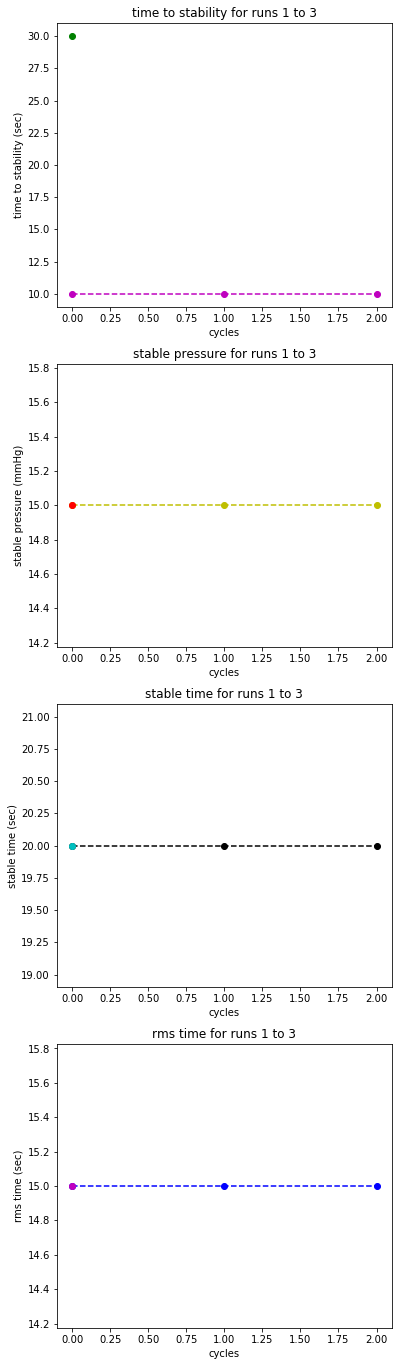

1

In [86]:
#RECORD AND PLOT CYCLE DATA

#record(time_to_stability, stable_pressure, stable_time, rms_time, run, cycle)
record(10, 15, 20, 15, 1, 1)
record(10, 15, 20, 15, 1, 2)
record(10, 15, 20, 15, 1, 3)
record(30, 15, 20, 15, 2, 1)
print(list(all_runs))
plot_all(1, 3)